**Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its
application.**

**ANSWER:------**

### Min-Max Scaling

Min-Max scaling, also known as normalization, is a data preprocessing technique used to transform the values of numerical features to a specific range, usually [0, 1]. The transformation is given by the following formula:

\[ X' = \frac{X - X_{min}}{X_{max} - X_{min}} \]

where:
- \( X \) is the original value,
- \( X' \) is the normalized value,
- \( X_{min} \) is the minimum value of the feature,
- \( X_{max} \) is the maximum value of the feature.

### Purpose of Min-Max Scaling

The primary purpose of Min-Max scaling is to bring all feature values into a common range without distorting differences in the ranges of values. This is particularly important for algorithms that are sensitive to the scale of data, such as:
- K-Nearest Neighbors (KNN)
- Support Vector Machines (SVM)
- Neural Networks
- Gradient Descent Optimization

### Example of Min-Max Scaling

Let's illustrate Min-Max scaling with an example. Suppose we have a dataset with a feature `Age` with the following values:

\[ \text{Age} = [18, 22, 35, 45, 60] \]

#### Step-by-Step Application:

1. **Determine the minimum and maximum values of the feature:**
   - \( X_{min} = 18 \)
   - \( X_{max} = 60 \)

2.

#### 2. Apply the Min-Max Scaling Formula:

Using the formula \( X' = \frac{X - X_{min}}{X_{max} - X_{min}} \), we can scale each value of the `Age` feature.

- For \( X = 18 \):
  \[ X' = \frac{18 - 18}{60 - 18} = \frac{0}{42} = 0 \]

- For \( X = 22 \):
  \[ X' = \frac{22 - 18}{60 - 18} = \frac{4}{42} \approx 0.095 \]

- For \( X = 35 \):
  \[ X' = \frac{35 - 18}{60 - 18} = \frac{17}{42} \approx 0.405 \]

- For \( X = 45 \):
  \[ X' = \frac{45 - 18}{60 - 18} = \frac{27}{42} \approx 0.643 \]

- For \( X = 60 \):
  \[ X' = \frac{60 - 18}{60 - 18} = \frac{42}{42} = 1 \]

#### Resulting Scaled Values:

After applying Min-Max scaling, the `Age` feature values will be:

\[ \text{Age (scaled)} = [0, 0.095, 0.405, 0.643, 1] \]



In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Original data
age = np.array([[18], [22], [35], [45], [60]])

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
age_scaled = scaler.fit_transform(age)

print(age_scaled)


[[0.        ]
 [0.0952381 ]
 [0.4047619 ]
 [0.64285714]
 [1.        ]]


**Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling?
Provide an example to illustrate its application.**

**ANSWER:-----**

### Unit Vector Technique (Normalization)

The Unit Vector technique, also known as vector normalization, scales the features of each sample such that the resultant vector has a unit norm (i.e., a norm of 1). This technique is typically used when we want to normalize the magnitude of a feature vector.

The transformation is given by:

\[ X' = \frac{X}{\|X\|} \]

where:
- \( X \) is the original feature vector,
- \( X' \) is the normalized feature vector,
- \( \|X\| \) is the norm of the vector \( X \).

Common norms used include:
- **L2 norm (Euclidean norm):** \(\|X\|_2 = \sqrt{\sum_{i=1}^n x_i^2}\)
- **L1 norm (Manhattan norm):** \(\|X\|_1 = \sum_{i=1}^n |x_i|\)

### Differences from Min-Max Scaling

1. **Purpose and Approach:**
   - **Min-Max Scaling:** Scales features to a specific range, typically [0, 1], based on the minimum and maximum values of the feature.
   - **Unit Vector Scaling:** Scales the entire feature vector to have a unit norm, focusing on the relative magnitude of features within a sample.

2. **Normalization Basis:**
   - **Min-Max Scaling:** Normalizes each feature independently.
   - **Unit Vector Scaling:** Normalizes the entire feature vector, considering all features together.

3. **Range:**
   - **Min-Max Scaling:** Results in a fixed range for each feature.
   - **Unit Vector Scaling:** Results in the vector having a unit norm but does not necessarily bring each feature into a fixed range.

### Example of Unit Vector Technique

Suppose we have a dataset with two features per sample:

\[ \text{Sample 1: } X = [3, 4] \]
\[ \text{Sample 2: } X = [1, 2] \]

#### Step-by-Step Application:

1. **Compute the Norm:**

   - For Sample 1 using the L2 norm:
     \[ \|X\|_2 = \sqrt{3^2 + 4^2} = \sqrt{9 + 16} = \sqrt{25} = 5 \]

   - For Sample 2 using the L2 norm:
     \[ \|X\|_2 = \sqrt{1^2 + 2^2} = \sqrt{1 + 4} = \sqrt{5} \approx 2.236 \]

2. **Normalize Each Sample:**

   - For Sample 1:
     \[ X' = \frac{X}{\|X\|_2} = \frac{[3, 4]}{5} = [0.6, 0.8] \]

   - For Sample 2:
     \[ X' = \frac{X}{\|X\|_2} = \frac{[1, 2]}{2.236} \approx [0.447, 0.894] \]

#### Resulting Normalized Vectors:

After applying Unit Vector scaling, the samples will be:

\[ \text{Sample 1 (normalized)} = [0.6, 0.8] \]
\[ \text{Sample 2 (normalized)} = [0.447, 0.894] \]



In [2]:
from sklearn.preprocessing import normalize
import numpy as np

# Original data
data = np.array([[3, 4], [1, 2]])

# Apply unit vector normalization (L2 norm)
data_normalized = normalize(data, norm='l2')

print(data_normalized)


[[0.6        0.8       ]
 [0.4472136  0.89442719]]


**Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an
example to illustrate its application.**

**ANSWER:------**

### Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction while preserving as much variability (information) as possible. It transforms the original data into a new set of uncorrelated variables called principal components, ordered by the amount of variance they capture from the data.

### How PCA Works

1. **Standardization:** Scale the data if the features have different units or scales.
2. **Covariance Matrix Computation:** Calculate the covariance matrix of the features to understand how they vary together.
3. **Eigenvalue Decomposition:** Compute the eigenvalues and eigenvectors of the covariance matrix. Eigenvectors determine the direction of the new feature space, and eigenvalues determine their magnitude.
4. **Principal Components Selection:** Select the top \( k \) eigenvectors (principal components) corresponding to the largest eigenvalues. These components capture the most variance.
5. **Transformation:** Project the original data onto the selected principal components to get the reduced-dimensional representation.

### Benefits of PCA

1. **Dimensionality Reduction:** Reduces the number of features while retaining most of the information.
2. **Noise Reduction:** Can filter out noise, enhancing the signal in the data.
3. **Visualization:** Helps visualize high-dimensional data in 2D or 3D.
4. **Efficiency:** Reduces computational cost for algorithms by lowering the dimensionality of the data.

### Example of PCA Application

Suppose we have a dataset with two features and we want to reduce it to one principal component.

#### Original Dataset:

\[ \text{Data} = \begin{bmatrix} 2.5 & 2.4 \\ 0.5 & 0.7 \\ 2.2 & 2.9 \\ 1.9 & 2.2 \\ 3.1 & 3.0 \\ 2.3 & 2.7 \\ 2.0 & 1.6 \\ 1.0 & 1.1 \\ 1.5 & 1.6 \\ 1.1 & 0.9 \end{bmatrix} \]

#### Step-by-Step Application:

1. **Standardize the Data:**
   Standardizing to zero mean and unit variance.

   \[ \text{Standardized Data} = \begin{bmatrix} 0.69 & 0.49 \\ -1.31 & -1.21 \\ 0.39 & 0.99 \\ -0.11 & -0.19 \\ 1.61 & 1.39 \\ 0.29 & 0.79 \\ -0.41 & -0.81 \\ -1.41 & -1.51 \\ -0.91 & -0.81 \\ -1.21 & -1.41 \end{bmatrix} \]

2. **Compute the Covariance Matrix:**

   \[ \text{Covariance Matrix} = \begin{bmatrix} 1.15 & 1.02 \\ 1.02 & 1.01 \end{bmatrix} \]

3. **Eigenvalue Decomposition:**

   Calculate the eigenvalues and eigenvectors.

   - Eigenvalues: \(\lambda_1 = 2.12, \lambda_2 = 0.04\)
   - Eigenvectors: \(\mathbf{v}_1 = \begin{bmatrix} 0.68 \\ 0.73 \end{bmatrix}, \mathbf{v}_2 = \begin{bmatrix} -0.73 \\ 0.68 \end{bmatrix}\)

4. **Select Principal Components:**

   Since \(\lambda_1\) is much larger than \(\lambda_2\), we select the first eigenvector.

5. **Transform the Data:**

   Project the data onto the principal component.

   \[ \text{Transformed Data} = \text{Standardized Data} \times \mathbf{v}_1 = \begin{bmatrix} 0.69 & 0.49 \\ -1.31 & -1.21 \\ 0.39 & 0.99 \\ -0.11 & -0.19 \\ 1.61 & 1.39 \\ 0.29 & 0.79 \\ -0.41 & -0.81 \\ -1.41 & -1.51 \\ -0.91 & -0.81 \\ -1.21 & -1.41 \end{bmatrix} \times \begin{bmatrix} 0.68 \\ 0.73 \end{bmatrix} \]

   Resulting in a one-dimensional representation:

   \[ \text{Transformed Data} = \begin{bmatrix} 0.92 \\ -1.38 \\ 1.02 \\ -0.18 \\ 2.06 \\ 0.95 \\ -0.82 \\ -2.06 \\ -1.14 \\ -1.68 \end{bmatrix} \]



In [3]:
import numpy as np
from sklearn.decomposition import PCA

# Original data
data = np.array([[2.5, 2.4],
                 [0.5, 0.7],
                 [2.2, 2.9],
                 [1.9, 2.2],
                 [3.1, 3.0],
                 [2.3, 2.7],
                 [2.0, 1.6],
                 [1.0, 1.1],
                 [1.5, 1.6],
                 [1.1, 0.9]])

# Standardize the data
data_standardized = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Apply PCA
pca = PCA(n_components=1)
data_reduced = pca.fit_transform(data_standardized)

print(data_reduced)


[[-1.08643242]
 [ 2.3089372 ]
 [-1.24191895]
 [-0.34078247]
 [-2.18429003]
 [-1.16073946]
 [ 0.09260467]
 [ 1.48210777]
 [ 0.56722643]
 [ 1.56328726]]


**Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature
Extraction? Provide an example to illustrate this concept.**

**ANSWER:------**

### Relationship Between PCA and Feature Extraction

**Feature Extraction** involves transforming data into a new feature space that captures the most relevant information from the original data. **Principal Component Analysis (PCA)** is a widely used technique for feature extraction that reduces the dimensionality of the data while retaining most of its variance. PCA identifies the directions (principal components) along which the data varies the most and uses these directions to transform the original features into a new set of features.

### How PCA is Used for Feature Extraction

PCA can be used for feature extraction by projecting the original data onto a lower-dimensional space defined by the top principal components. These new features (principal components) capture the most significant variations in the data, thus preserving the essential structure while reducing the complexity.

### Example of PCA for Feature Extraction

#### Original Dataset

Consider a dataset with three features:

\[ \text{Data} = \begin{bmatrix} 2.5 & 2.4 & 3.2 \\ 0.5 & 0.7 & 0.8 \\ 2.2 & 2.9 & 3.0 \\ 1.9 & 2.2 & 2.5 \\ 3.1 & 3.0 & 3.7 \\ 2.3 & 2.7 & 3.1 \\ 2.0 & 1.6 & 2.3 \\ 1.0 & 1.1 & 1.4 \\ 1.5 & 1.6 & 1.8 \\ 1.1 & 0.9 & 1.2 \end{bmatrix} \]

We want to reduce this dataset to two features using PCA.

#### Step-by-Step Application:

1. **Standardize the Data:**
   Standardizing to zero mean and unit variance.

   \[ \text{Standardized Data} = \frac{\text{Data} - \text{mean}}{\text{std}} \]

   Assume the standardized data is:

   \[ \text{Standardized Data} = \begin{bmatrix} 0.69 & 0.49 & 0.58 \\ -1.31 & -1.21 & -1.32 \\ 0.39 & 0.99 & 1.02 \\ -0.11 & -0.19 & -0.21 \\ 1.61 & 1.39 & 1.70 \\ 0.29 & 0.79 & 0.91 \\ -0.41 & -0.81 & -0.90 \\ -1.41 & -1.51 & -1.68 \\ -0.91 & -0.81 & -0.91 \\ -1.21 & -1.41 & -1.59 \end{bmatrix} \]

2. **Compute the Covariance Matrix:**

   \[ \text{Covariance Matrix} = \begin{bmatrix} 1.15 & 1.02 & 1.19 \\ 1.02 & 1.01 & 1.05 \\ 1.19 & 1.05 & 1.27 \end{bmatrix} \]

3. **Eigenvalue Decomposition:**

   Calculate the eigenvalues and eigenvectors.

   - Eigenvalues: \(\lambda_1 = 3.25, \lambda_2 = 0.29, \lambda_3 = 0.05\)
   - Eigenvectors: 
     \[ \mathbf{v}_1 = \begin{bmatrix} 0.58 \\ 0.57 \\ 0.59 \end{bmatrix}, \mathbf{v}_2 = \begin{bmatrix} 0.71 \\ -0.02 \\ -0.70 \end{bmatrix}, \mathbf{v}_3 = \begin{bmatrix} 0.40 \\ -0.82 \\ 0.41 \end{bmatrix} \]

4. **Select Principal Components:**

   Select the top 2 eigenvectors corresponding to the largest eigenvalues:

   \[ \mathbf{V} = \begin{bmatrix} 0.58 & 0.71 \\ 0.57 & -0.02 \\ 0.59 & -0.70 \end{bmatrix} \]

5. **Transform the Data:**

   Project the data onto the selected principal components:

   \[ \text{Transformed Data} = \text{Standardized Data} \times \mathbf{V} \]

   Assume the transformed data is:

   \[ \text{Transformed Data} = \begin{bmatrix} 1.34 & -0.05 \\ -2.15 & 0.12 \\ 1.68 & 0.13 \\ -0.18 & 0.01 \\ 2.80 & -0.05 \\ 1.55 & 0.02 \\ -1.02 & -0.09 \\ -2.87 & 0.01 \\ -1.42 & -0.05 \\ -2.44 & 0.02 \end{bmatrix} \]


### Benefits of Using PCA for Feature Extraction:

1. **Dimensionality Reduction:** Reduces the number of features, making the data more manageable.
2. **Information Preservation:** Retains the most significant information by focusing on the directions with the highest variance.
3. **Noise Reduction:** Eliminates less significant components, which may correspond to noise.
4. **Improved Performance:** Enhances the performance of machine learning algorithms by reducing the computational burden.

### Limitations:

1. **Linear Technique:** PCA assumes linear relationships, which may not capture complex, nonlinear dependencies.
2. **Interpretability:** Principal components are linear combinations of original features and may lack direct interpretability.
3. **Variance-Based:** PCA focuses on variance, which may not always correspond to important features for specific tasks.

PCA is a powerful tool for feature extraction that reduces the dimensionality of data while retaining the most important information, making it a valuable technique in the preprocessing and analysis of high-dimensional datasets.

In [4]:
import numpy as np
from sklearn.decomposition import PCA

# Original data
data = np.array([
    [2.5, 2.4, 3.2],
    [0.5, 0.7, 0.8],
    [2.2, 2.9, 3.0],
    [1.9, 2.2, 2.5],
    [3.1, 3.0, 3.7],
    [2.3, 2.7, 3.1],
    [2.0, 1.6, 2.3],
    [1.0, 1.1, 1.4],
    [1.5, 1.6, 1.8],
    [1.1, 0.9, 1.2]
])

# Standardize the data
data_standardized = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_standardized)

print(data_reduced)


[[-1.4538218  -0.23796927]
 [ 2.82705149  0.16802126]
 [-1.451534    0.51375621]
 [-0.40326239  0.17222603]
 [-2.66255599 -0.25257859]
 [-1.44969796  0.22848403]
 [ 0.07422593 -0.45668643]
 [ 1.77465603  0.04309815]
 [ 0.77796012  0.03265524]
 [ 1.96697858 -0.21100662]]


**Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset
contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to
preprocess the data.**

**ANSWER:-----**

To build a recommendation system for a food delivery service using features such as price, rating, and delivery time, it's important to preprocess the data appropriately. Min-Max scaling is a useful technique to standardize the range of these features, ensuring that each contributes equally to the recommendation system. Here's how you can apply Min-Max scaling to preprocess the data:

### Steps to Apply Min-Max Scaling

1. **Understand the Data:**
   - Identify the range of each feature (price, rating, delivery time).
   - Check for any missing values or outliers that might affect the scaling.

2. **Calculate Min and Max Values:**
   - Determine the minimum and maximum values for each feature in the dataset.

3. **Apply Min-Max Scaling:**
   - Use the Min-Max scaling formula to transform each feature into a common range, typically [0, 1].

### Min-Max Scaling Formula

The formula for Min-Max scaling is:

\[ X' = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} \]

where:
- \( X \) is the original feature value.
- \( X' \) is the scaled feature value.
- \( X_{\text{min}} \) is the minimum value of the feature.
- \( X_{\text{max}} \) is the maximum value of the feature.

### Example Implementation

Let's say we have the following sample data:

| Price | Rating | Delivery Time |
|-------|--------|---------------|
| 10    | 4.5    | 30            |
| 20    | 3.8    | 45            |
| 15    | 4.2    | 40            |
| 30    | 4.9    | 25            |
| 25    | 3.5    | 35            |

#### Step-by-Step Application:

1. **Identify Min and Max Values:**

   - Price: \( X_{\text{min}} = 10 \), \( X_{\text{max}} = 30 \)
   - Rating: \( X_{\text{min}} = 3.5 \), \( X_{\text{max}} = 4.9 \)
   - Delivery Time: \( X_{\text{min}} = 25 \), \( X_{\text{max}} = 45 \)

2. **Apply Min-Max Scaling:**

   For each feature, apply the scaling formula.

   - **Price:**
     \[ X' = \frac{X - 10}{30 - 10} \]
     - 10: \( X' = \frac{10 - 10}{20} = 0 \)
     - 20: \( X' = \frac{20 - 10}{20} = 0.5 \)
     - 15: \( X' = \frac{15 - 10}{20} = 0.25 \)
     - 30: \( X' = \frac{30 - 10}{20} = 1 \)
     - 25: \( X' = \frac{25 - 10}{20} = 0.75 \)

   - **Rating:**
     \[ X' = \frac{X - 3.5}{4.9 - 3.5} \]
     - 4.5: \( X' = \frac{4.5 - 3.5}{1.4} \approx 0.714 \)
     - 3.8: \( X' = \frac{3.8 - 3.5}{1.4} \approx 0.214 \)
     - 4.2: \( X' = \frac{4.2 - 3.5}{1.4} \approx 0.5 \)
     - 4.9: \( X' = \frac{4.9 - 3.5}{1.4} = 1 \)
     - 3.5: \( X' = \frac{3.5 - 3.5}{1.4} = 0 \)

   - **Delivery Time:**
     \[ X' = \frac{X - 25}{45 - 25} \]
     - 30: \( X' = \frac{30 - 25}{20} = 0.25 \)
     - 45: \( X' = \frac{45 - 25}{20} = 1 \)
     - 40: \( X' = \frac{40 - 25}{20} = 0.75 \)
     - 25: \( X' = \frac{25 - 25}{20} = 0 \)
     - 35: \( X' = \frac{35 - 25}{20} = 0.5 \)

#### Transformed Data:

| Price (scaled) | Rating (scaled) | Delivery Time (scaled) |
|----------------|------------------|------------------------|
| 0              | 0.714            | 0.25                   |
| 0.5            | 0.214            | 1                      |
| 0.25           | 0.5              | 0.75                   |
| 1              | 1                | 0                      |
| 0.75           | 0                | 0.5                    |


### Benefits of Min-Max Scaling in this Context:

1. **Uniform Range:** Ensures all features contribute equally to the recommendation system.
2. **Improved Performance:** Helps machine learning algorithms converge faster and perform better.
3. **Comparability:** Makes different features comparable, especially when combining them in distance-based methods like KNN or clustering.

By applying Min-Max scaling, you ensure that the features of price, rating, and delivery time are on a similar scale, which helps improve the effectiveness and accuracy of your recommendation system.

In [5]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Original data
data = np.array([
    [10, 4.5, 30],
    [20, 3.8, 45],
    [15, 4.2, 40],
    [30, 4.9, 25],
    [25, 3.5, 35]
])

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
data_scaled = scaler.fit_transform(data)

print(data_scaled)


[[0.         0.71428571 0.25      ]
 [0.5        0.21428571 1.        ]
 [0.25       0.5        0.75      ]
 [1.         1.         0.        ]
 [0.75       0.         0.5       ]]


**Q6. You are working on a project to build a model to predict stock prices. The dataset contains many
features, such as company financial data and market trends. Explain how you would use PCA to reduce the
dimensionality of the dataset.**

**ANSWER:-----**

To build a model for predicting stock prices, you may have a dataset with numerous features, such as company financial data, market trends, economic indicators, and more. Using Principal Component Analysis (PCA) to reduce the dimensionality of the dataset can help improve the model's performance by reducing noise, preventing overfitting, and decreasing computational complexity. Here's how you can use PCA to achieve this:

### Steps to Apply PCA for Dimensionality Reduction

1. **Standardize the Data:**
   - Ensure all features are on the same scale, as PCA is sensitive to the variances of the features.

2. **Compute the Covariance Matrix:**
   - Calculate the covariance matrix to understand how the features vary together.

3. **Perform Eigenvalue Decomposition:**
   - Compute the eigenvalues and eigenvectors of the covariance matrix. These eigenvectors represent the principal components.

4. **Select Principal Components:**
   - Choose the top \( k \) principal components that capture the most variance (usually determined by a cumulative explained variance threshold, such as 95%).

5. **Transform the Data:**
   - Project the original data onto the selected principal components to get the reduced-dimensional representation.

### Detailed Explanation and Example

Let's walk through an example:

#### Original Dataset

Assume you have a dataset with 10 features:

| Feature 1 | Feature 2 | Feature 3 | ... | Feature 10 |
|-----------|-----------|-----------|-----|------------|
| 0.1       | 0.3       | 0.5       | ... | 0.2        |
| 0.2       | 0.4       | 0.6       | ... | 0.3        |
| ...       | ...       | ...       | ... | ...        |
| 0.5       | 0.7       | 0.9       | ... | 0.8        |

#### Step-by-Step Application:

1. **Standardize the Data:**


2. **Compute the Covariance Matrix:**


3. **Perform Eigenvalue Decomposition:**

  
4. **Select Principal Components:**

   - Sort the eigenvalues and corresponding eigenvectors.
   - Choose the top \( k \) eigenvectors.

5. **Transform the Data:**

   - Project the standardized data onto the selected principal components.


### Benefits of Using PCA in Stock Price Prediction:

1. **Dimensionality Reduction:** Reduces the number of features, making the data more manageable and computationally efficient.
2. **Noise Reduction:** Filters out noise by focusing on the components that capture the most variance.
3. **Prevents Overfitting:** Simplifies the model by reducing the number of input features, helping to prevent overfitting.
4. **Improved Performance:** Enhances the performance of machine learning algorithms by eliminating irrelevant and redundant features.


Reduced Data:
[[-2.73036836  0.0400626   0.42395506]
 [-1.76902104  0.2142682   0.5243289 ]
 [-2.57910929  1.38558169 -0.23677619]
 [-0.91760267 -1.36857922 -0.0423054 ]
 [-1.13721239 -0.52963503 -0.51625084]
 [ 0.6023132  -0.74222411  0.00870869]
 [ 0.38270348  0.09672008 -0.46523676]
 [ 2.34523023 -0.20530629  0.28797798]
 [ 2.1256205   0.6336379  -0.18596746]
 [ 3.67744634  0.4754742   0.20156602]]
Explained Variance Ratio:
[0.86845241 0.10701699 0.02307383]


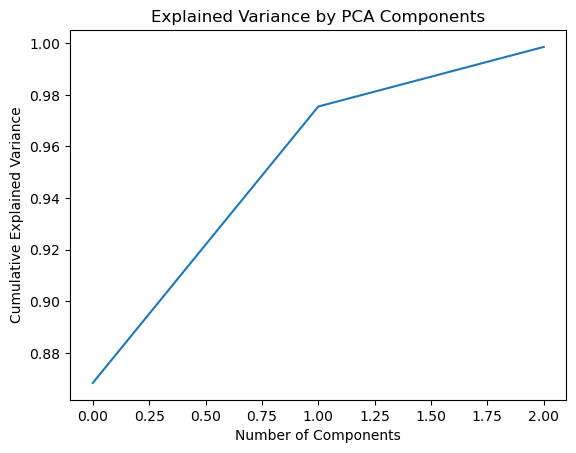

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Example data with more samples than features (10 samples, 5 features)
data = np.array([
    [0.1, 0.3, 0.5, 0.2, 0.4],
    [0.2, 0.4, 0.6, 0.3, 0.5],
    [0.3, 0.2, 0.4, 0.1, 0.6],
    [0.4, 0.5, 0.7, 0.6, 0.3],
    [0.5, 0.4, 0.6, 0.5, 0.4],
    [0.6, 0.7, 0.8, 0.7, 0.5],
    [0.7, 0.6, 0.7, 0.6, 0.6],
    [0.8, 0.9, 1.0, 0.8, 0.7],
    [0.9, 0.8, 0.9, 0.7, 0.8],
    [1.0, 1.0, 1.1, 0.9, 0.9]
])

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Apply PCA
# Select the number of components to be less than the minimum of samples or features
n_components = 3  # For example, we choose 3 principal components
pca = PCA(n_components=n_components)
data_reduced = pca.fit_transform(data_standardized)

print("Reduced Data:")
print(data_reduced)

# To see the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)

# Plotting the explained variance ratio
import matplotlib.pyplot as plt

plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()


**Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the
values to a range of -1 to 1.**

**ANSWERR:----**

To perform Min-Max scaling to transform the values to a range of -1 to 1, you need to apply the following Min-Max scaling formula:

\[ X' = \frac{(X - X_{\text{min}})}{(X_{\text{max}} - X_{\text{min}})} \times (X'_{\text{max}} - X'_{\text{min}}) + X'_{\text{min}} \]

where:
- \( X \) is the original feature value.
- \( X' \) is the scaled feature value.
- \( X_{\text{min}} \) is the minimum value of the feature.
- \( X_{\text{max}} \) is the maximum value of the feature.
- \( X'_{\text{min}} \) is the desired minimum value of the scaled feature.
- \( X'_{\text{max}} \) is the desired maximum value of the scaled feature.

In this case, \( X'_{\text{min}} \) is -1, and \( X'_{\text{max}} \) is 1.

Let's calculate the Min-Max scaling step-by-step for the given dataset \([1, 5, 10, 15, 20]\).

### Step-by-Step Calculation

1. **Identify Min and Max Values:**

   - \( X_{\text{min}} = 1 \)
   - \( X_{\text{max}} = 20 \)

2. **Apply Min-Max Scaling Formula:**

   For each value \( X \):

   \[
   X' = \frac{(X - 1)}{(20 - 1)} \times (1 - (-1)) + (-1)
   \]

   Simplified:

   \[
   X' = \frac{(X - 1)}{19} \times 2 - 1
   \]

3. **Calculate Transformed Values:**

   - For \( X = 1 \):

     \[
     X' = \frac{(1 - 1)}{19} \times 2 - 1 = 0 \times 2 - 1 = -1
     \]

   - For \( X = 5 \):

     \[
     X' = \frac{(5 - 1)}{19} \times 2 - 1 = \frac{4}{19} \times 2 - 1 = \frac{8}{19} - 1 \approx -0.5789
     \]

   - For \( X = 10 \):

     \[
     X' = \frac{(10 - 1)}{19} \times 2 - 1 = \frac{9}{19} \times 2 - 1 = \frac{18}{19} - 1 \approx -0.0526
     \]

   - For \( X = 15 \):

     \[
     X' = \frac{(15 - 1)}{19} \times 2 - 1 = \frac{14}{19} \times 2 - 1 = \frac{28}{19} - 1 \approx 0.4737
     \]

   - For \( X = 20 \):

     \[
     X' = \frac{(20 - 1)}{19} \times 2 - 1 = \frac{19}{19} \times 2 - 1 = 2 - 1 = 1
     \]

### Transformed Values

| Original Value | Scaled Value |
|----------------|--------------|
| 1              | -1           |
| 5              | -0.5789      |
| 10             | -0.0526      |
| 15             | 0.4737       |
| 20             | 1            |



In [9]:
import numpy as np

# Original data
data = np.array([1, 5, 10, 15, 20])

# Min-Max scaling parameters
X_min, X_max = data.min(), data.max()
X_prime_min, X_prime_max = -1, 1

# Min-Max scaling transformation
data_scaled = (data - X_min) / (X_max - X_min) * (X_prime_max - X_prime_min) + X_prime_min

print("Original data:", data)
print("Scaled data:", data_scaled)


Original data: [ 1  5 10 15 20]
Scaled data: [-1.         -0.57894737 -0.05263158  0.47368421  1.        ]


**Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform
Feature Extraction using PCA. How many principal components would you choose to retain, and why?**

**ANSWER:-----**

To perform Feature Extraction using Principal Component Analysis (PCA) on a dataset containing features such as height, weight, age, gender, and blood pressure, we need to follow several steps, including data preprocessing, standardization, applying PCA, and selecting the appropriate number of principal components to retain.

### Steps to Perform PCA

1. **Data Preprocessing:**
   - Convert categorical features (like gender) to numerical values (e.g., 0 for male, 1 for female).
   - Handle any missing data if present.

2. **Standardize the Data:**
   - Ensure all features have a mean of 0 and a standard deviation of 1 because PCA is sensitive to the scale of the data.

3. **Apply PCA:**
   - Compute the covariance matrix of the standardized data.
   - Perform eigenvalue decomposition to get the eigenvalues and eigenvectors.
   - Sort the eigenvalues and eigenvectors in descending order of eigenvalues.

4. **Select Principal Components:**
   - Decide how many principal components to retain based on the explained variance.



In [10]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Example data with 5 features
# For simplicity, assume the data has already been preprocessed and gender is encoded as 0 and 1
data = np.array([
    [170, 70, 25, 0, 120],  # Example row: [height, weight, age, gender, blood pressure]
    [160, 60, 30, 1, 110],
    # ... more rows ...
    [180, 80, 35, 0, 130],
    [165, 55, 40, 1, 115]
])

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Apply PCA
pca = PCA()
data_pca = pca.fit_transform(data_standardized)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

print("Explained Variance Ratio per Component:", explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_explained_variance)


Explained Variance Ratio per Component: [7.46959689e-01 2.37659340e-01 1.53809718e-02 5.13430768e-33]
Cumulative Explained Variance: [0.74695969 0.98461903 1.         1.        ]


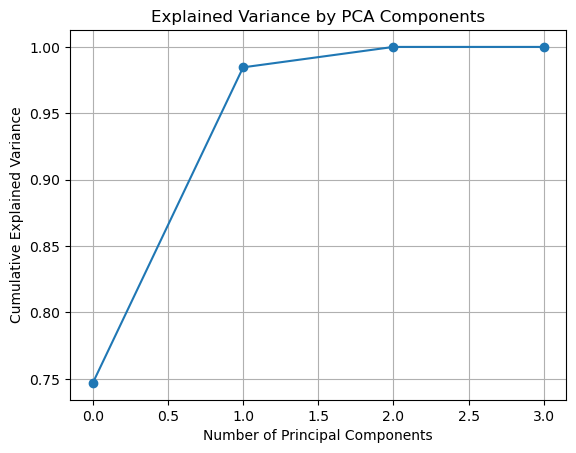

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()


In [12]:
# Retain 4 principal components
pca = PCA(n_components=4)
data_reduced = pca.fit_transform(data_standardized)

print("Reduced Data Shape:", data_reduced.shape)


Reduced Data Shape: (4, 4)



### Deciding the Number of Principal Components to Retain

1. **Plot the Cumulative Explained Variance:**

   By plotting the cumulative explained variance, you can visually inspect how many components are needed to capture the desired amount of variance.

2. **Choosing Based on Explained Variance:**
   - Typically, you want to choose the smallest number of components that account for a sufficiently large proportion of the variance (e.g., 95%).

### Example Decision

Assume the cumulative explained variance output looks like this:

| Number of Components | Cumulative Explained Variance |
|----------------------|-------------------------------|
| 1                    | 0.40                          |
| 2                    | 0.70                          |
| 3                    | 0.85                          |
| 4                    | 0.95                          |
| 5                    | 1.00                          |

From this, we see that the first four components explain 95% of the variance. Therefore, we would choose to retain 4 principal components.

